In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data.csv


In [3]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv("pima-indians-diabetes.data.csv", names = names)
X = df.iloc[:,0:8]
Y = df.iloc[:,8]

In [5]:
kfold=KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model,X,Y,cv=kfold)
results

array([0.71428571, 0.84415584, 0.68831169, 0.66233766, 0.76623377,
       0.80519481, 0.77922078, 0.83116883, 0.71052632, 0.72368421])

In [6]:
results.mean()*100

75.25119617224881

**Grid Search CV - Hyper Parameter Tuning**

In [7]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = dict(n_neighbors=np.array(range(1,40)))
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [11]:
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [12]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


**Visualize Grid Search CV Results**

In [14]:
k_scores=[]
for k in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, Y, cv=10,scoring = "accuracy")
  k_scores.append(scores.mean())
pd.Series(k_scores).sort_values(ascending=False)

16    0.755297
17    0.755280
13    0.753913
15    0.752614
21    0.750120
20    0.750068
22    0.747522
18    0.747471
11    0.747368
24    0.746206
19    0.746189
14    0.744805
23    0.743592
9     0.743472
37    0.742259
34    0.742242
12    0.742208
6     0.739627
38    0.738380
8     0.738346
7     0.738312
26    0.737081
32    0.737064
35    0.737030
10    0.736945
33    0.735748
36    0.735731
5     0.735714
30    0.734450
25    0.733168
28    0.731852
31    0.731852
27    0.730537
29    0.725359
4     0.721377
3     0.718712
1     0.712235
2     0.703059
0     0.679665
dtype: float64

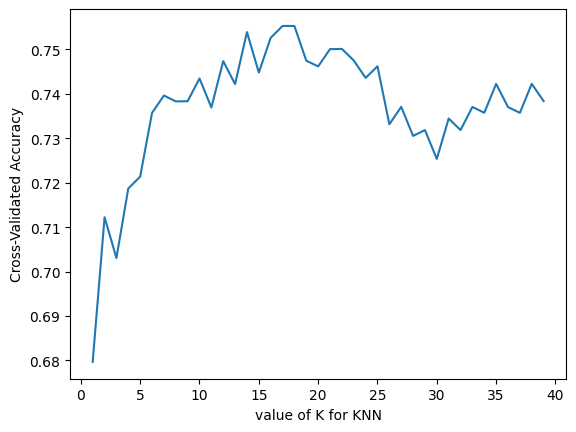

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1,40)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,Y, cv=10)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel("value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.show()